In [2]:
# Import libraries
import pandas as pd
import folium
import os
import geopandas as gpd

pd.set_option('display.max_columns', None)

In [4]:
# Load the shape of the zone (California counties)
# Find the original file here: https://github.com/codeforamerica/click_that_hood/blob/master/public/data/california-counties.geojson
# You have to download this file and set the directory where you saved it
geo_path = os.path.join(os.getcwd(), '../data/water_boundaries.geojson')
geo_data = folium.GeoJson(open(geo_path, encoding="utf-8-sig").read())
geo_dict = geo_data.data['features']
print('There are '+str(len(geo_dict))+' rows')
print('There are '+str(len(set([feat['properties']['pwsid'] for feat in geo_dict])))+' unique PWSIDs.')


There are 5254 rows
There are 4824 unique PWSIDs.


In [6]:
deliv_file = os.path.join(os.getcwd(), '1_initial_eda___deliv.csv')
deliv_data = pd.read_csv(deliv_file)
print('There are '+str(len(deliv_data['PWSID'].unique()))+' unique PWSIDs.')
deliv_data[0:5]

There are 2527 unique PWSIDs.


,PWSID,Water.System.Name,Water.System.Classification,Year,Month,Date,Days.In.Month,CALCULATED GPCD (Total delivery to residential in gallons per capita day),"Total. RESIDENTIAL Delivered.Gallons (Total Does not include Landscape Irrigation, Agricultural or to other PWS)",WATER DELIVERIES TO Agricultural,WATER DELIVERIES TO Commercial.Institutional,WATER DELIVERIES TO Industrial,WATER DELIVERIES TO Landscape.Irrigation,WATER DELIVERIES TO Multi.family.Residential,WATER DELIVERIES TO Other.PWS,WATER DELIVERIES TO Other,"WATER DELIVERIES Total.Delivered Residential IN REVISED UNITS (Total Does not include Landscape Irrigation, Agricultural or to other PWS)"
0,CA0103040,NORRIS CANYON PROPERTY OWNERS ASSN,Community Water System,2016,April,4/1/2016,30,85.1,127710.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127710.0
1,CA0103040,NORRIS CANYON PROPERTY OWNERS ASSN,Community Water System,2016,August,8/1/2016,31,178.6,276755.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,276755.0
2,CA0103040,NORRIS CANYON PROPERTY OWNERS ASSN,Community Water System,2016,December,12/1/2016,31,135.6,210175.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210175.0
3,CA0103040,NORRIS CANYON PROPERTY OWNERS ASSN,Community Water System,2016,February,2/1/2016,29,81.6,118248.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118248.0
4,CA0103040,NORRIS CANYON PROPERTY OWNERS ASSN,Community Water System,2016,January,1/1/2016,31,81.6,126403.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126403.0


In [53]:
prod_file = os.path.join(os.getcwd(), '1_initial_eda___prod.csv')
prod_data = pd.read_csv(prod_file)
print('There are '+str(len(prod_data['PWSID'].unique()))+' unique PWSIDs.')
print(type(prod_data))
prod_data.head()

There are 5838 unique PWSIDs.
<class 'pandas.core.frame.DataFrame'>


,PWSID,Water.System.Name,Water.System.Classification,Year,Month,Date,Days.In.Month,CALCULATED GPCD (Total Potable Produced in gallons per capita day),FINSIHIED WATER PURCHASED OR RECEIVED FROM ANOTHER PUBLIC WATER SYSTEM,Non-Potable Produced Water (EXCLUDING RECYCLING),RECYCLED WATER PRODUCED,"TOTAL POTABLE WATER IN GALLONS (Total Does not Include Sold, Non-potable and Recycled amounts)","TOTAL POTABLE WATER PRODUCED USING REVISED UNITS (Total Does not Include Sold, Non-potable and Recycled amounts)",WATER PRODUCED FROM GROUNDWATER,WATER PRODUCED FROM SURFACE WATER,WATER SOLD TO ANOTHER PUBLIC WATER SYSTEM,key
0,CA0103040,NORRIS CANYON PROPERTY OWNERS ASSN,Community Water System,2016,April,4/1/2016,30,85.1,NaN,NaN,NaN,127710.0,127710.0,127710.0,NaN,NaN,4/1/2016___CA0103040
1,CA0103040,NORRIS CANYON PROPERTY OWNERS ASSN,Community Water System,2016,August,8/1/2016,31,178.6,NaN,NaN,NaN,276755.0,276755.0,276755.0,NaN,NaN,8/1/2016___CA0103040
2,CA0103040,NORRIS CANYON PROPERTY OWNERS ASSN,Community Water System,2016,December,12/1/2016,31,135.6,NaN,NaN,NaN,210175.0,210175.0,210175.0,NaN,NaN,12/1/2016___CA0103040
3,CA0103040,NORRIS CANYON PROPERTY OWNERS ASSN,Community Water System,2016,February,2/1/2016,29,81.6,NaN,NaN,NaN,118248.0,118248.0,118248.0,NaN,NaN,2/1/2016___CA0103040
4,CA0103040,NORRIS CANYON PROPERTY OWNERS ASSN,Community Water System,2016,January,1/1/2016,31,81.6,NaN,NaN,NaN,126403.0,126403.0,126403.0,NaN,NaN,1/1/2016___CA0103040


In [54]:
print(prod_data['Water.System.Classification'].unique())

['Community Water System' 'Nontransient Noncommunity Water System'
 'Local Government' 'Transient Noncommunity Water System'
 'Large Water System'
 'Privately owned, PUC-regulated, for profit water company' nan
 'Privately owned business (non-community)']


In [56]:
import numpy as np
# make all systems other than 'Nontransient Noncommunity Water System' 0
prod_data['Water.System.Classification'] = prod_data['Water.System.Classification'].map({'Community Water System': 0,
                                                                                         'Nontransient Noncommunity Water System': 1,
                                                                                         'Local Government': 0,
                                                                                         'Transient Noncommunity Water System': 0,
                                                                                         'Large Water System': 0,
                                                                                         'Privately owned, PUC-regulated, for profit water company': 0,
                                                                                         'Privately owned business (non-community)': 0,
                                                                                         np.nan: 0})
print(prod_data['Water.System.Classification'].unique())
prod_data.head()

[0 1]


,PWSID,Water.System.Name,Water.System.Classification,Year,Month,Date,Days.In.Month,CALCULATED GPCD (Total Potable Produced in gallons per capita day),FINSIHIED WATER PURCHASED OR RECEIVED FROM ANOTHER PUBLIC WATER SYSTEM,Non-Potable Produced Water (EXCLUDING RECYCLING),RECYCLED WATER PRODUCED,"TOTAL POTABLE WATER IN GALLONS (Total Does not Include Sold, Non-potable and Recycled amounts)","TOTAL POTABLE WATER PRODUCED USING REVISED UNITS (Total Does not Include Sold, Non-potable and Recycled amounts)",WATER PRODUCED FROM GROUNDWATER,WATER PRODUCED FROM SURFACE WATER,WATER SOLD TO ANOTHER PUBLIC WATER SYSTEM,key
0,CA0103040,NORRIS CANYON PROPERTY OWNERS ASSN,0,2016,April,4/1/2016,30,85.1,NaN,NaN,NaN,127710.0,127710.0,127710.0,NaN,NaN,4/1/2016___CA0103040
1,CA0103040,NORRIS CANYON PROPERTY OWNERS ASSN,0,2016,August,8/1/2016,31,178.6,NaN,NaN,NaN,276755.0,276755.0,276755.0,NaN,NaN,8/1/2016___CA0103040
2,CA0103040,NORRIS CANYON PROPERTY OWNERS ASSN,0,2016,December,12/1/2016,31,135.6,NaN,NaN,NaN,210175.0,210175.0,210175.0,NaN,NaN,12/1/2016___CA0103040
3,CA0103040,NORRIS CANYON PROPERTY OWNERS ASSN,0,2016,February,2/1/2016,29,81.6,NaN,NaN,NaN,118248.0,118248.0,118248.0,NaN,NaN,2/1/2016___CA0103040
4,CA0103040,NORRIS CANYON PROPERTY OWNERS ASSN,0,2016,January,1/1/2016,31,81.6,NaN,NaN,NaN,126403.0,126403.0,126403.0,NaN,NaN,1/1/2016___CA0103040


In [14]:
# Change water system classification to integer classes
#prod_data['Water.System.Classification'] = pd.factorize(prod_data['Water.System.Classification'])[0] + 1
#print(prod_data['Water.System.Classification'].unique())
#prod_data.head()

[1 2 3 4 5 6 7 8]


,PWSID,Water.System.Name,Water.System.Classification,Year,Month,Date,Days.In.Month,CALCULATED GPCD (Total Potable Produced in gallons per capita day),FINSIHIED WATER PURCHASED OR RECEIVED FROM ANOTHER PUBLIC WATER SYSTEM,Non-Potable Produced Water (EXCLUDING RECYCLING),RECYCLED WATER PRODUCED,"TOTAL POTABLE WATER IN GALLONS (Total Does not Include Sold, Non-potable and Recycled amounts)","TOTAL POTABLE WATER PRODUCED USING REVISED UNITS (Total Does not Include Sold, Non-potable and Recycled amounts)",WATER PRODUCED FROM GROUNDWATER,WATER PRODUCED FROM SURFACE WATER,WATER SOLD TO ANOTHER PUBLIC WATER SYSTEM,key
0,CA0103040,NORRIS CANYON PROPERTY OWNERS ASSN,1,2016,April,4/1/2016,30,85.1,NaN,NaN,NaN,127710.0,127710.0,127710.0,NaN,NaN,4/1/2016___CA0103040
1,CA0103040,NORRIS CANYON PROPERTY OWNERS ASSN,1,2016,August,8/1/2016,31,178.6,NaN,NaN,NaN,276755.0,276755.0,276755.0,NaN,NaN,8/1/2016___CA0103040
2,CA0103040,NORRIS CANYON PROPERTY OWNERS ASSN,1,2016,December,12/1/2016,31,135.6,NaN,NaN,NaN,210175.0,210175.0,210175.0,NaN,NaN,12/1/2016___CA0103040
3,CA0103040,NORRIS CANYON PROPERTY OWNERS ASSN,1,2016,February,2/1/2016,29,81.6,NaN,NaN,NaN,118248.0,118248.0,118248.0,NaN,NaN,2/1/2016___CA0103040
4,CA0103040,NORRIS CANYON PROPERTY OWNERS ASSN,1,2016,January,1/1/2016,31,81.6,NaN,NaN,NaN,126403.0,126403.0,126403.0,NaN,NaN,1/1/2016___CA0103040


In [20]:
# get pwsids from geo json data
geo_pwsids = [feat['properties']['pwsid'] for feat in geo_dict]

# remove geo pwsids not in deliv_data
common_deliv_pwsid = [pwsid for pwsid in geo_pwsids if pwsid in deliv_data['PWSID'].values]
print('Now there are '+str(len(set(common_deliv_pwsid)))+' pwsids')
# remove geo pwsids not in prod_data
common_all_pwsid = [pwsid for pwsid in common_deliv_pwsid if pwsid in prod_data['PWSID'].values]
print('Now there are '+str(len(set(common_all_pwsid)))+' pwsids')

# these are the pswids in all 3 data sources
common_all_pwsid[0:5]

Now there are 2052 pwsids
Now there are 2052 pwsids


['CA4010024', 'CA3610032', 'CA3810010', 'CA5000092', 'CA1910130']

In [21]:
# remove deliv pwsids not in geo data
deliv_data = deliv_data[deliv_data['PWSID'].isin(common_all_pwsid)]
print(len(deliv_data['PWSID'].unique()))

# remove prod pwsids not in geo data
prod_data = prod_data[prod_data['PWSID'].isin(common_all_pwsid)]
print(len(prod_data['PWSID'].unique()))

2052
2052


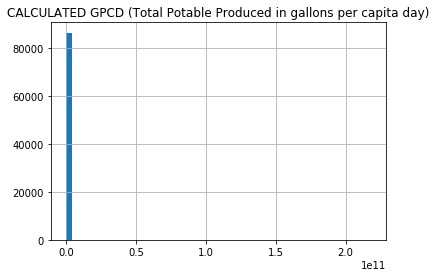

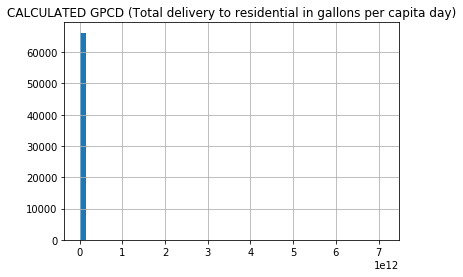

In [22]:
# check histograms of data columns of interest
import matplotlib.pyplot as plt

prod_data.hist(column='CALCULATED GPCD (Total Potable Produced in gallons per capita day)', bins=50)
plt.show()

deliv_data.hist(column='CALCULATED GPCD (Total delivery to residential in gallons per capita day)', bins=50)
plt.show()


In [23]:
# delete pwsids we don't have data for from geo_data
for feat in geo_dict:
    if feat['properties']['pwsid'] not in common_all_pwsid:
        try:
            geo_dict.remove(feat)
        except KeyError:
            pass
        
geo_pwsids = [feat['properties']['pwsid'] for feat in geo_dict]
print('Now there are '+ str(len(geo_pwsids))+' total pwsids and '+str(len(set(geo_pwsids)))+' unique pwsids.')

Now there are 2645 total pwsids and 2305 unique pwsids.


In [24]:
# put new geo_dict in geo_data for map construction
geo_data.data['features'] = geo_dict

In [65]:
# Initialize the map:
m = folium.Map(location=[37, -118], zoom_start=6)

In [66]:
# Add deliv_data chloropleth:
m.choropleth(
 geo_data=geo_data.data,
 data=deliv_data,
 columns=['PWSID', 'CALCULATED GPCD (Total delivery to residential in gallons per capita day)'],
 key_on='feature.properties.pwsid',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Delivery',
 reset=True,
 highlight=True,
 name='Delivery',
 threshold_scale=[0,200E3,400E3,600E3,800E3,1000E3]
)

# Add prod_data chloropleth:
m.choropleth(
 geo_data=geo_data.data,
 data=prod_data,
 columns=['PWSID', 'CALCULATED GPCD (Total Potable Produced in gallons per capita day)'],
 key_on='feature.properties.pwsid',
 fill_color='RdPu',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Production',
 reset=True,
 highlight=True,
 name='Production',
 threshold_scale=[0,200E3,400E3,600E3,800E3,1000E3]
)

# Add system type layer chloropleth:
m.choropleth(
 geo_data=geo_data.data,
 data=prod_data,
 columns=['PWSID', 'Water.System.Classification'],
 key_on='feature.properties.pwsid',
 fill_color='YlOrRd',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='System Type',
 reset=True,
 highlight=True,
 name='System Type',
 threshold_scale=[0,0.5,1]
)

# add layer control
folium.LayerControl().add_to(m)

In [67]:
# Save to html
m.save('ca_water_systems_folium_chloropleth.html')

In [35]:
import folium.colormap as cm
cm.StepColormap(['r','y','g','c','b','m'])


ModuleNotFoundError: No module named 'folium.colormap'